### TERMINOLOGY

In [1]:
# simple regression tree modelling out continuous prediction based on feature 'X'
# splitting is getting a data on the node and splitting it in other nodes (maybe in T or F)

# root node is on top from which splitting is done
# leaf (terminal node) the bottom node from which no nodes are extending
# parent and children node

# tree branches (sub trees)
# pruning (basically cutting) avoids overfitting

### GINI IMPURITY

In [2]:
# matematical measurement of how pure the information in the data set is
# in terms of classification it can be as a measurement of class uniformity
# if the goal of a decision tree is to seperate out teh classes we can use giniimpurity to decide on the data split values
# we want to miniize the gini impurity at leaf nodes
# minimized impurity at the leaf nodes means we are seperating the classes effectively

### CONSTRUCTING DECISION TREES WITH GINI IMPURITY

##### PART 1

In [3]:
# we have to decide which feature to use as root node
# we can use gini imp to compare teh information contained within features for the training data

##### PART 2

In [5]:
# exploring the gini impurity for :
# 1. continuous numeric features
# 2. mlti categorical features (N>2)
# 3. choosing a root node feature

In [6]:
# watch a video if can not understand

In [8]:
# how does the decision tre decide on the root node of the multi-feature dataset?
# calculate the gini imp values of each feature and choose the lowest imp value to split on first
# by doing this we are choosing a feature that best splits the data into 'pure' classes

In [9]:
# we can do pruning(cutting out some leaf nodes and making the parent roots to be the new leaf nodes)
# we can also mandate a max depth of tree

### CODING DECISION TREES

##### PART 1 - THE DATA

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('penguins_size.csv')

In [13]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [14]:
# feature engineering

In [16]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [20]:
df = df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [22]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [23]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [24]:
df[df['sex'] == '.']
# filling this row based on the average of others

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [27]:
df[df['species'] =='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [28]:
# when we want to the change the single cell value use at call
df.at[336,'sex'] = 'FEMALE'

In [30]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

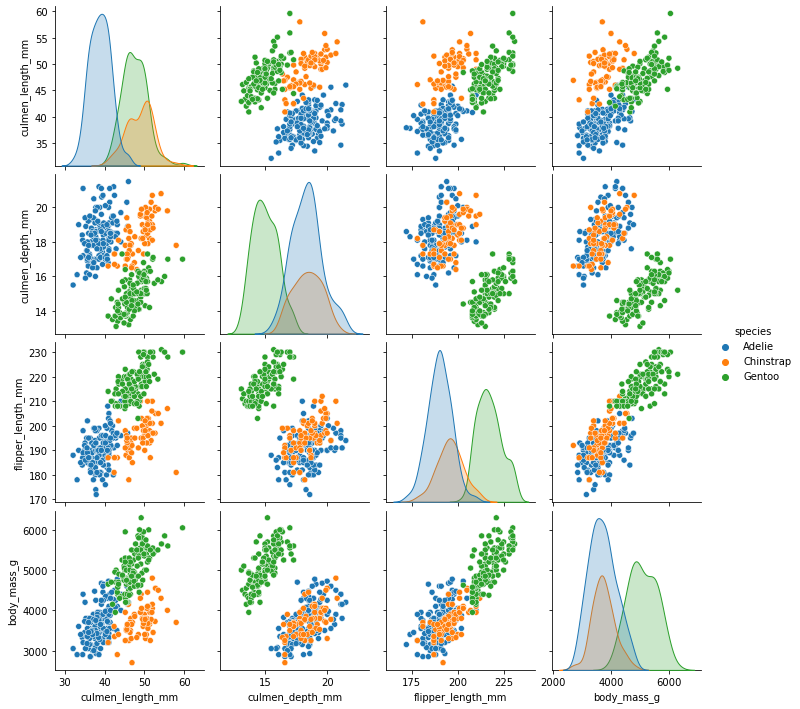

In [31]:
sns.pairplot(df,hue='species')

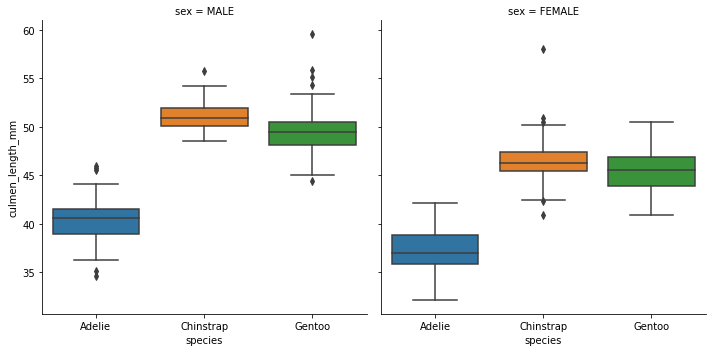

In [33]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box',col='sex')

In [35]:
pd.get_dummies(df.drop('species', axis = 1), drop_first=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

In [36]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first=True)
y = df['species']

In [40]:
# skip the scaling process because we are analyzing each feature seperately
# since we are not comparing a feature with others we do not need scaling

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=101)

##### PART 2 - CREATING THE MODEL

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
base_preds = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [50]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


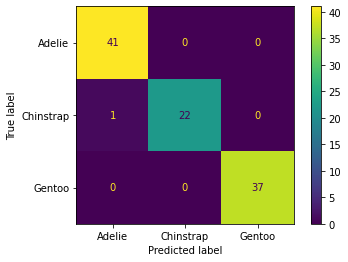

In [51]:
plot_confusion_matrix(model, X_test, y_test)

In [52]:
model.feature_importances_

array([0.33609286, 0.04203954, 0.54282921, 0.01085298, 0.0681854 ,
       0.        , 0.        ])

In [53]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [57]:
pd.DataFrame(index = X.columns, data=model.feature_importances_, columns=['Feature Importance'] ).sort_values('Feature Importance')

Feature Importance
island_Torgersen             0.000000
sex_MALE                     0.000000
body_mass_g                  0.010853
culmen_depth_mm              0.042040
island_Dream                 0.068185
culmen_length_mm             0.336093
flipper_length_mm            0.542829

In [58]:
from sklearn.tree import plot_tree

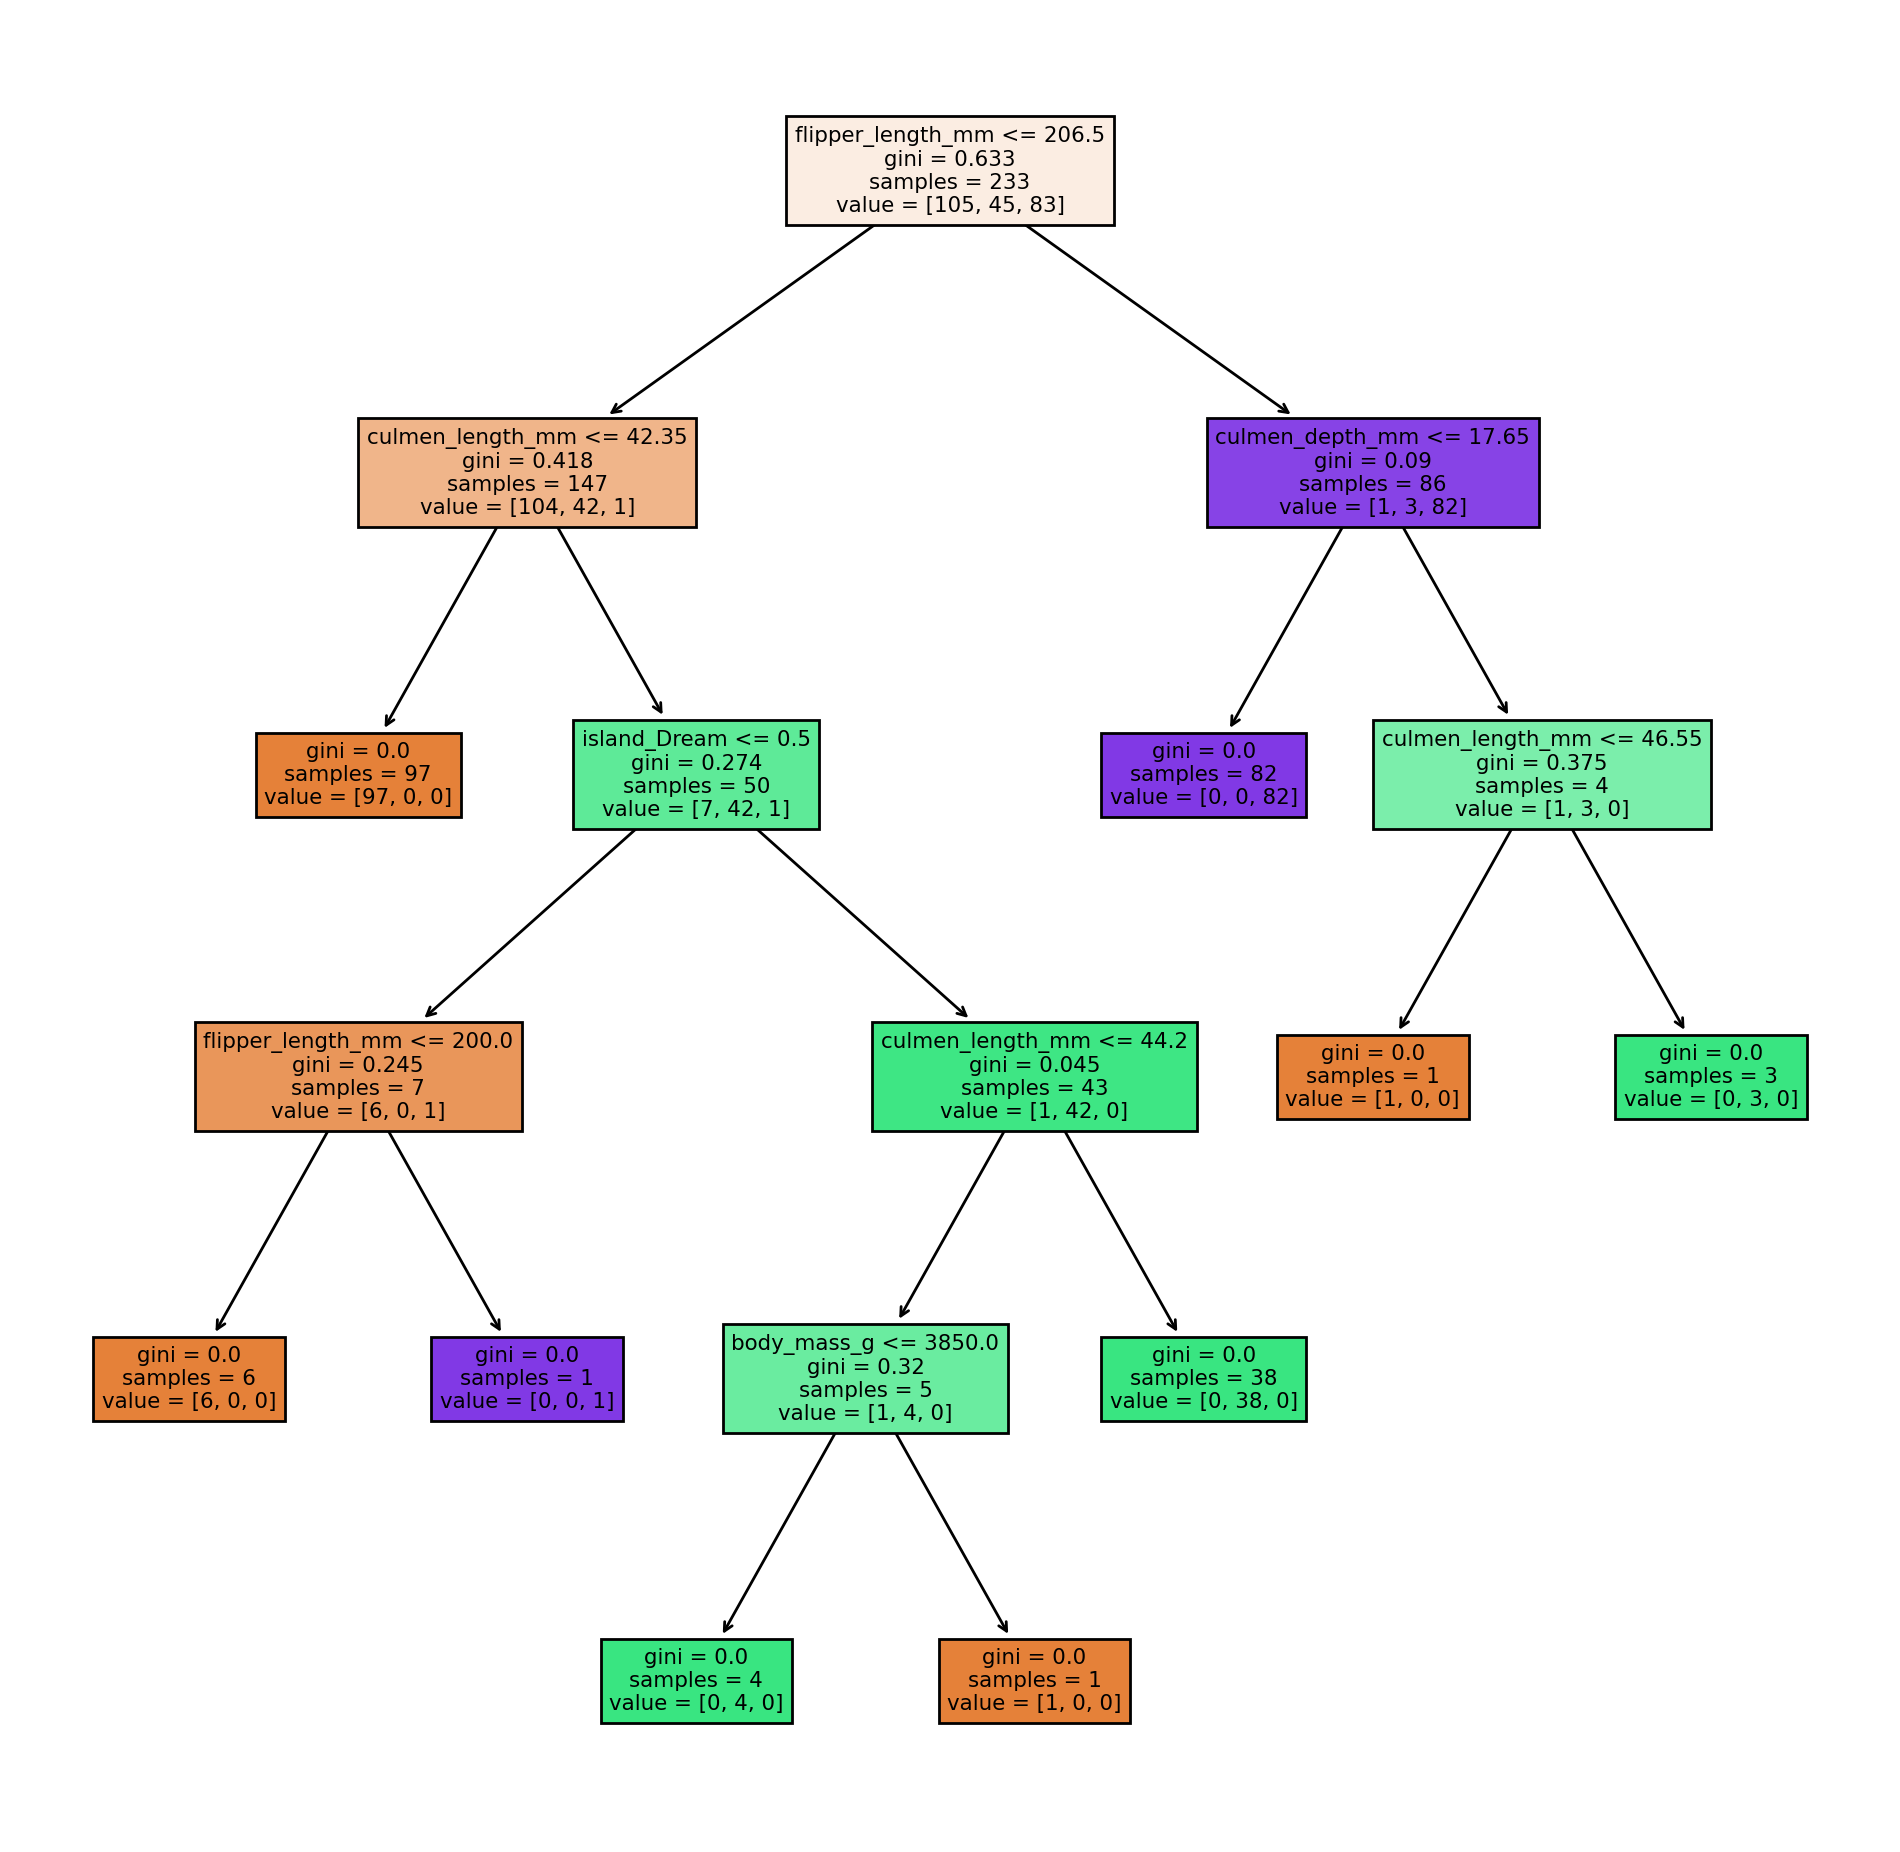

In [67]:
plt.figure(figsize=(12,12), dpi = 200)
plot_tree(model, feature_names=X.columns, filled=True);
# by including the feature_name in the parameter it only include the names in the tree

In [68]:
X_train

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
194              50.9             19.1              196.0       3550.0   
22               35.9             19.2              189.0       3800.0   
92               34.0             17.1              185.0       3400.0   
149              37.8             18.1              193.0       3750.0   
156              52.7             19.8              197.0       3725.0   
..                ...              ...                ...          ...   
81               42.9             17.6              196.0       4700.0   
93               39.6             18.1              186.0       4450.0   
69               41.8             19.4              198.0       4450.0   
335              55.1             16.0              230.0       5850.0   
16               38.7             19.0              195.0       3450.0   

     island_Dream  island_Torgersen  sex_MALE  
194             1                 0         1  
22              0                 0         0  
92              1                 0         0  
149             1                 0         1  
156             1                 0         1  
..            ...               ...       ...  
81              0                 1         1  
93              1                 0         1  
69              0                 1         1  
335             0                 0         1  
16              0                 1         0  

[233 rows x 7 columns]

In [69]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi = 200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101





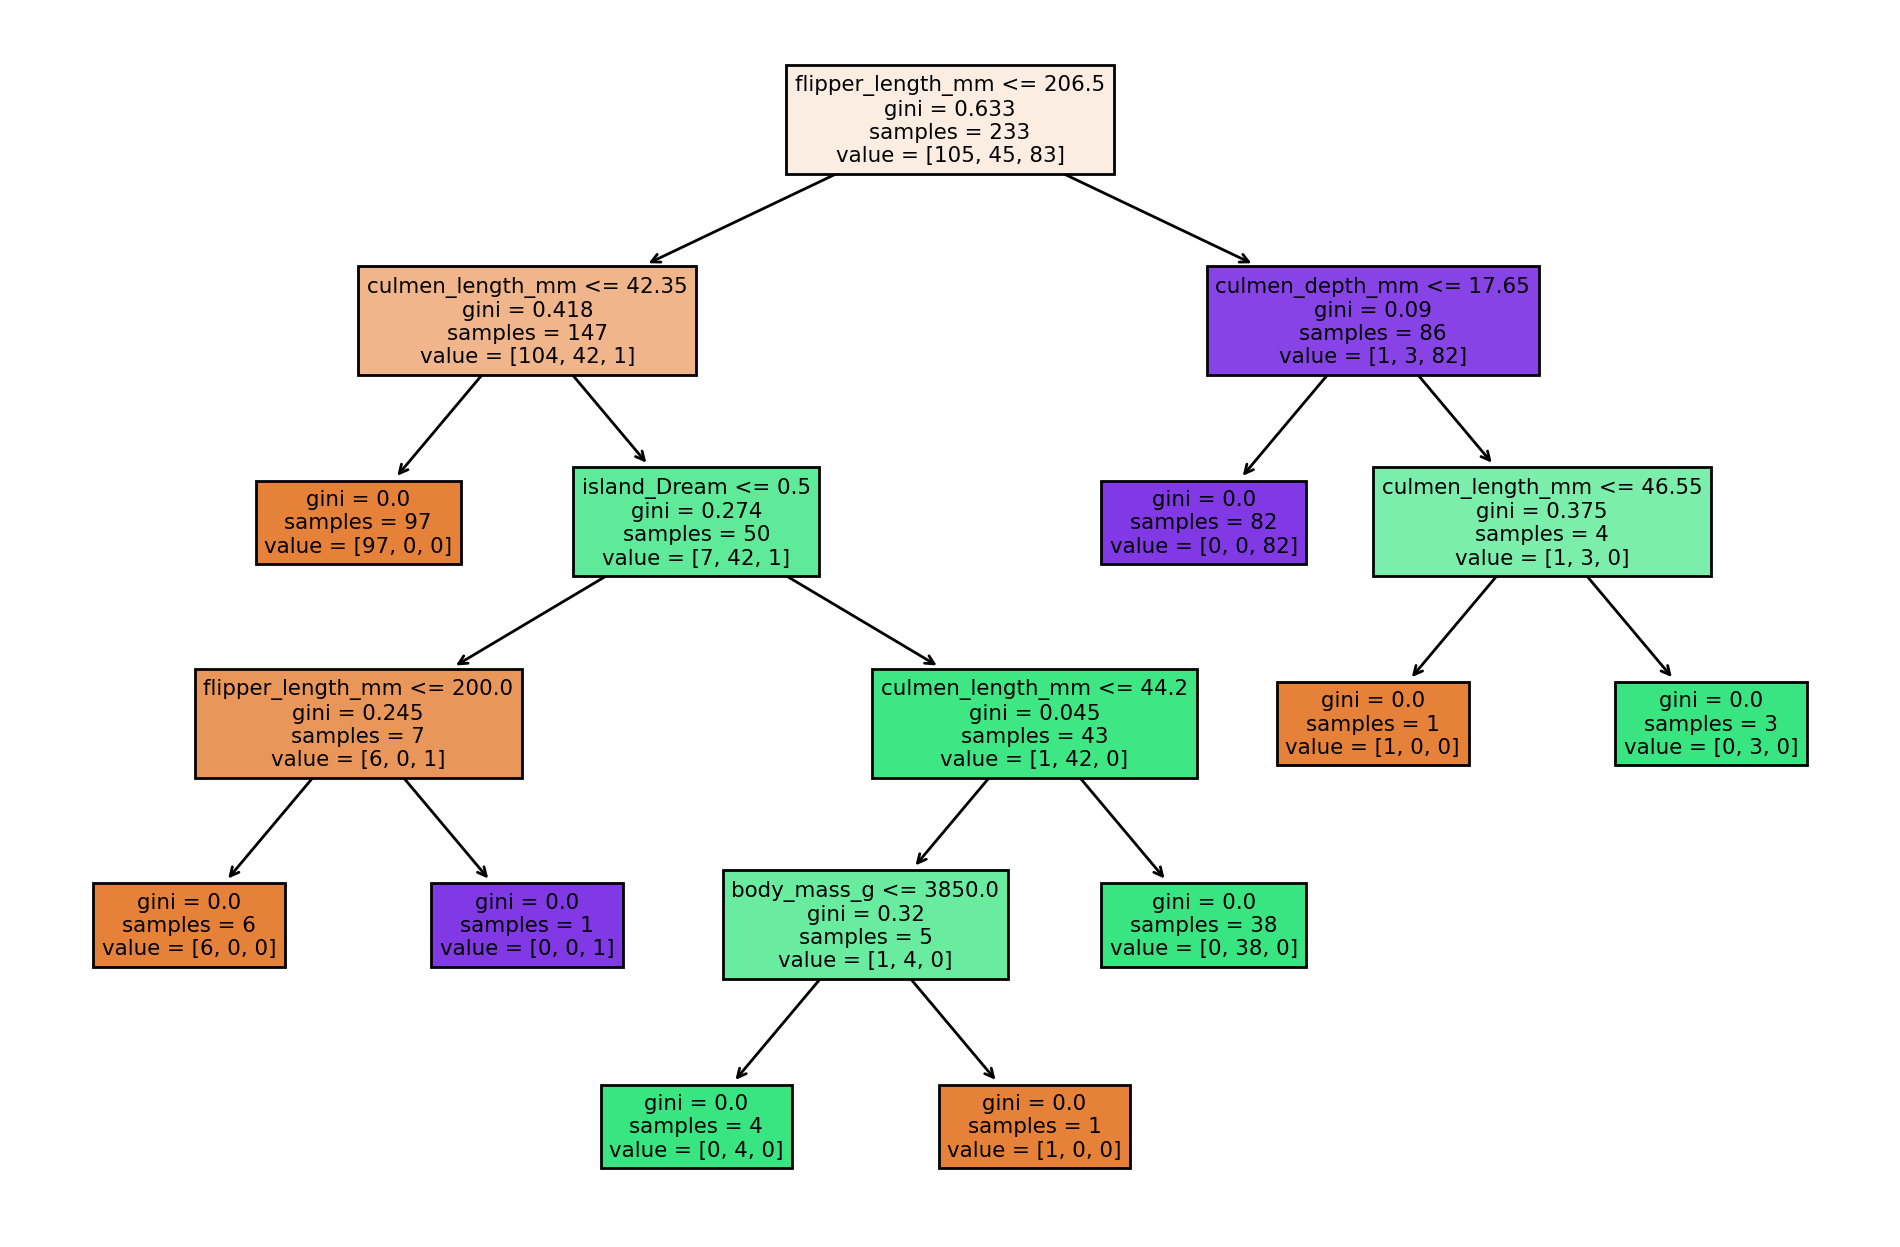

In [70]:
report_model(model)

In [86]:
pruned_tree = DecisionTreeClassifier(max_depth = 3)
# increasing the max_depth may increase overfitting

In [87]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





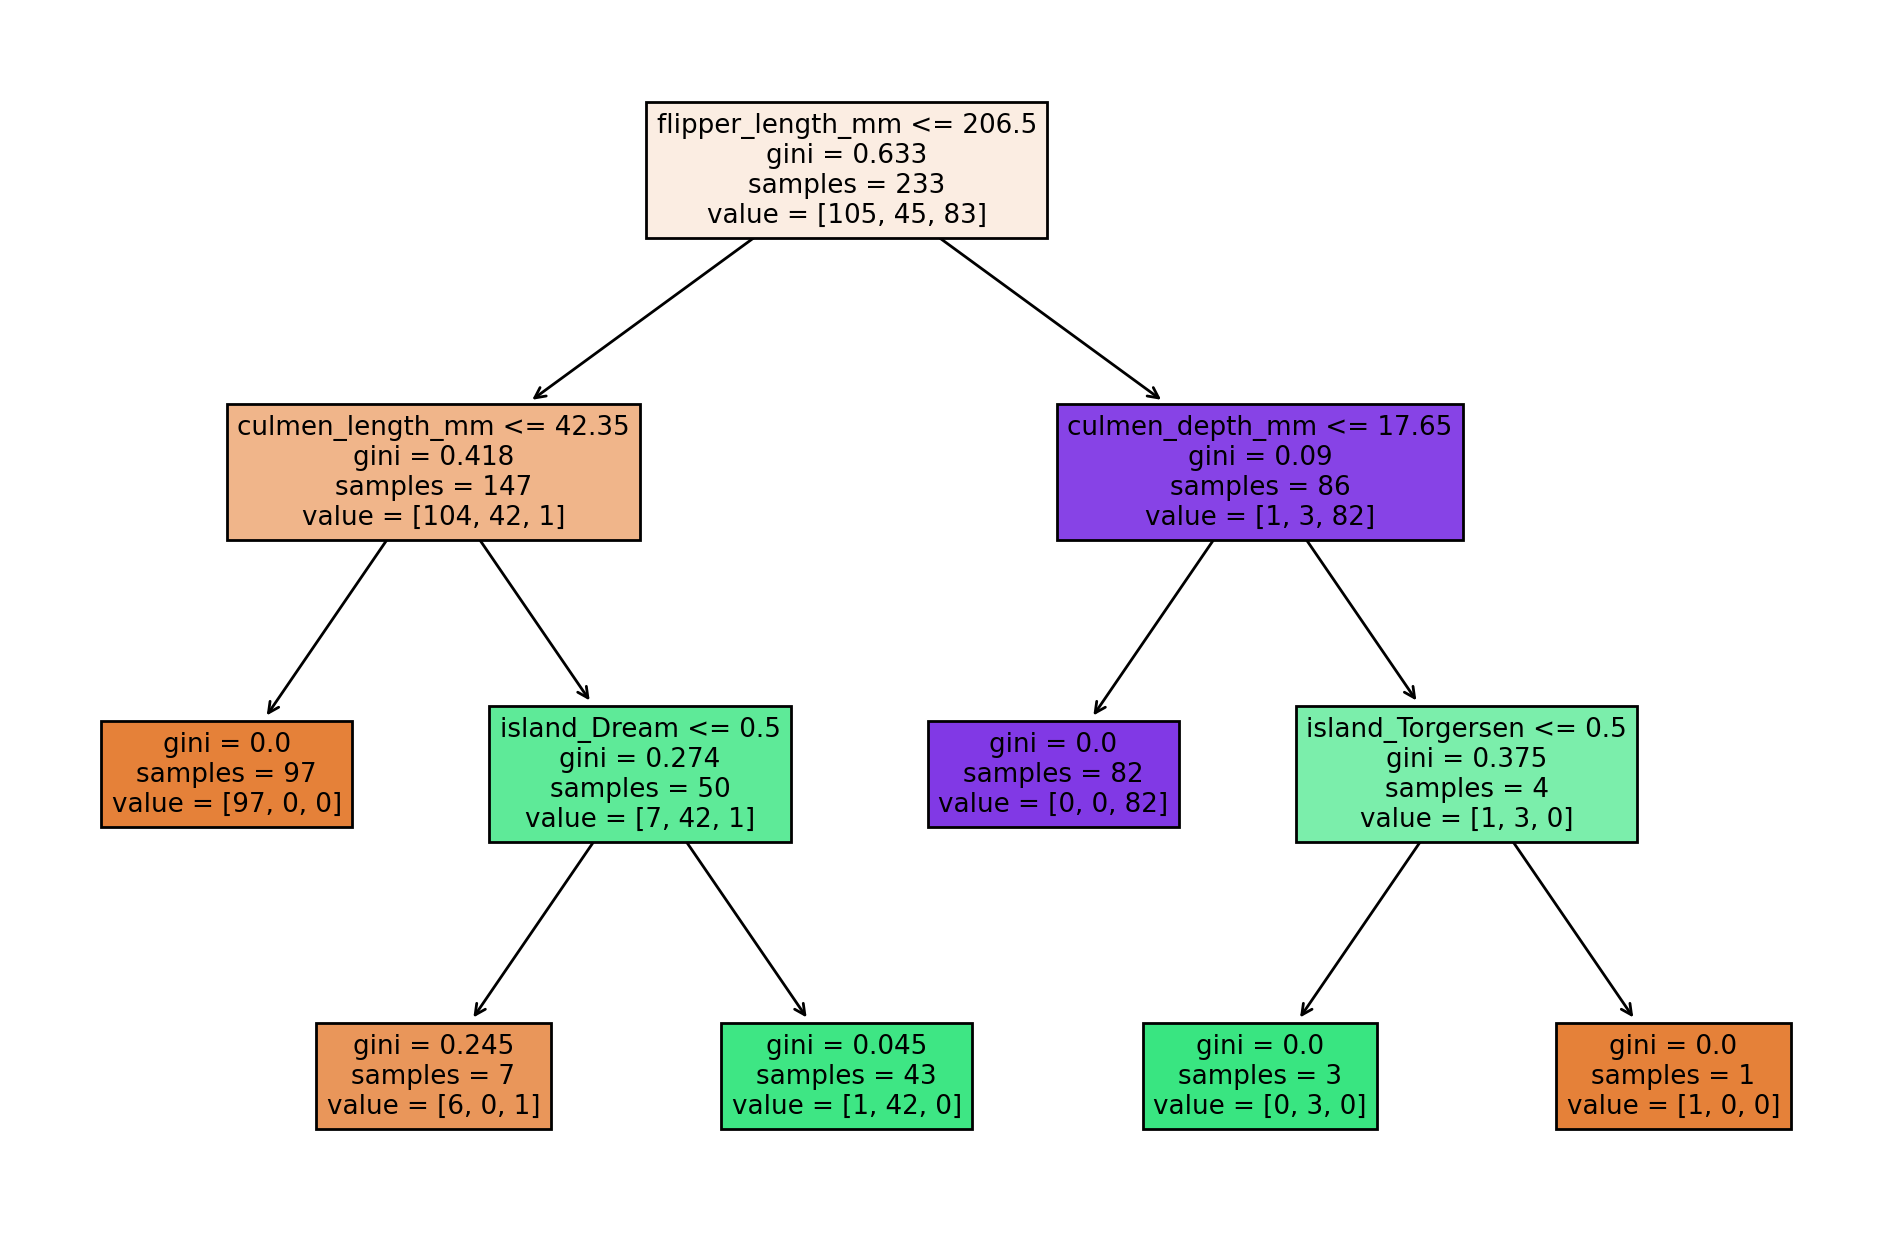

In [88]:
report_model(pruned_tree)

In [90]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)

In [92]:
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





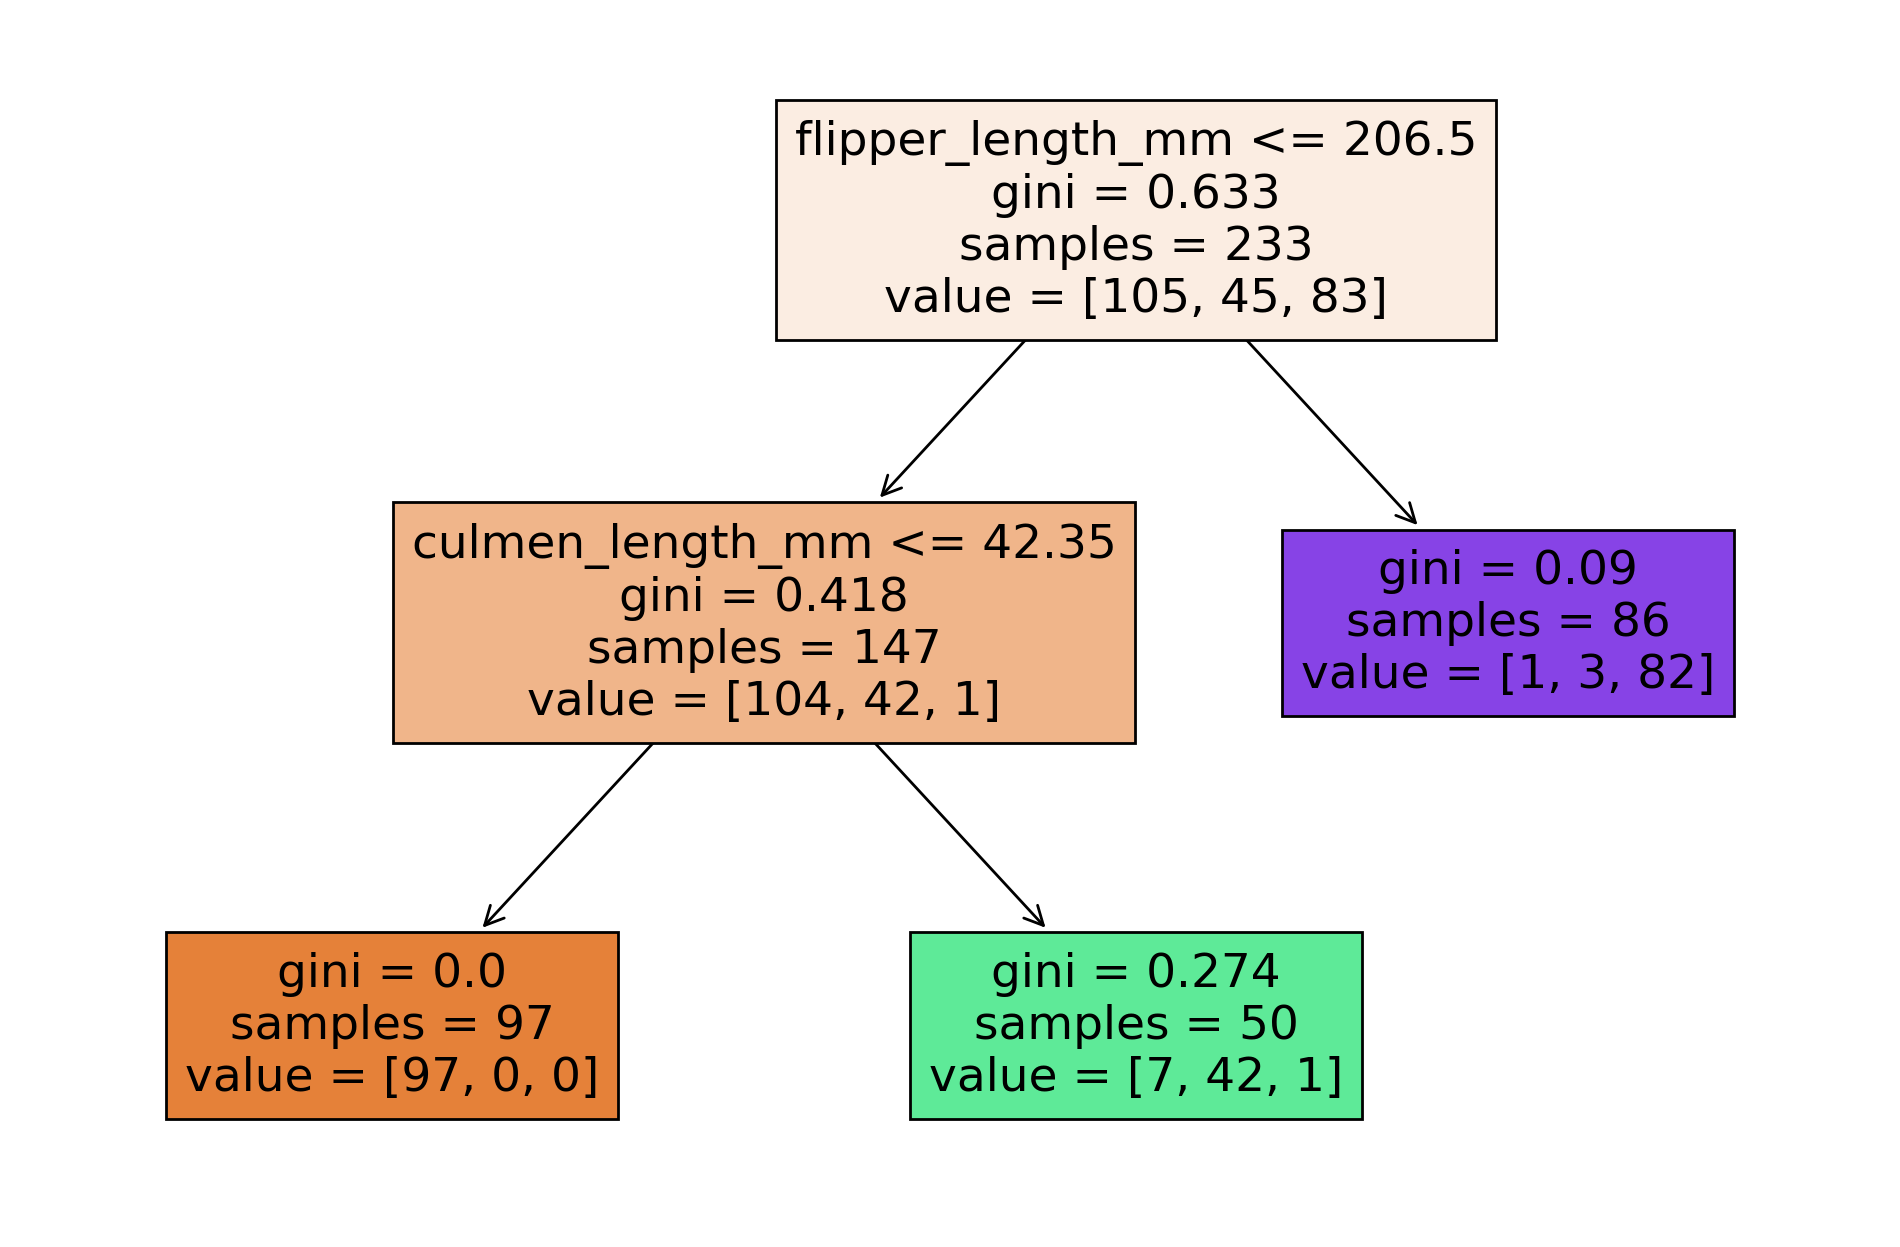

In [93]:
report_model(max_leaf_tree)

In [94]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [96]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101





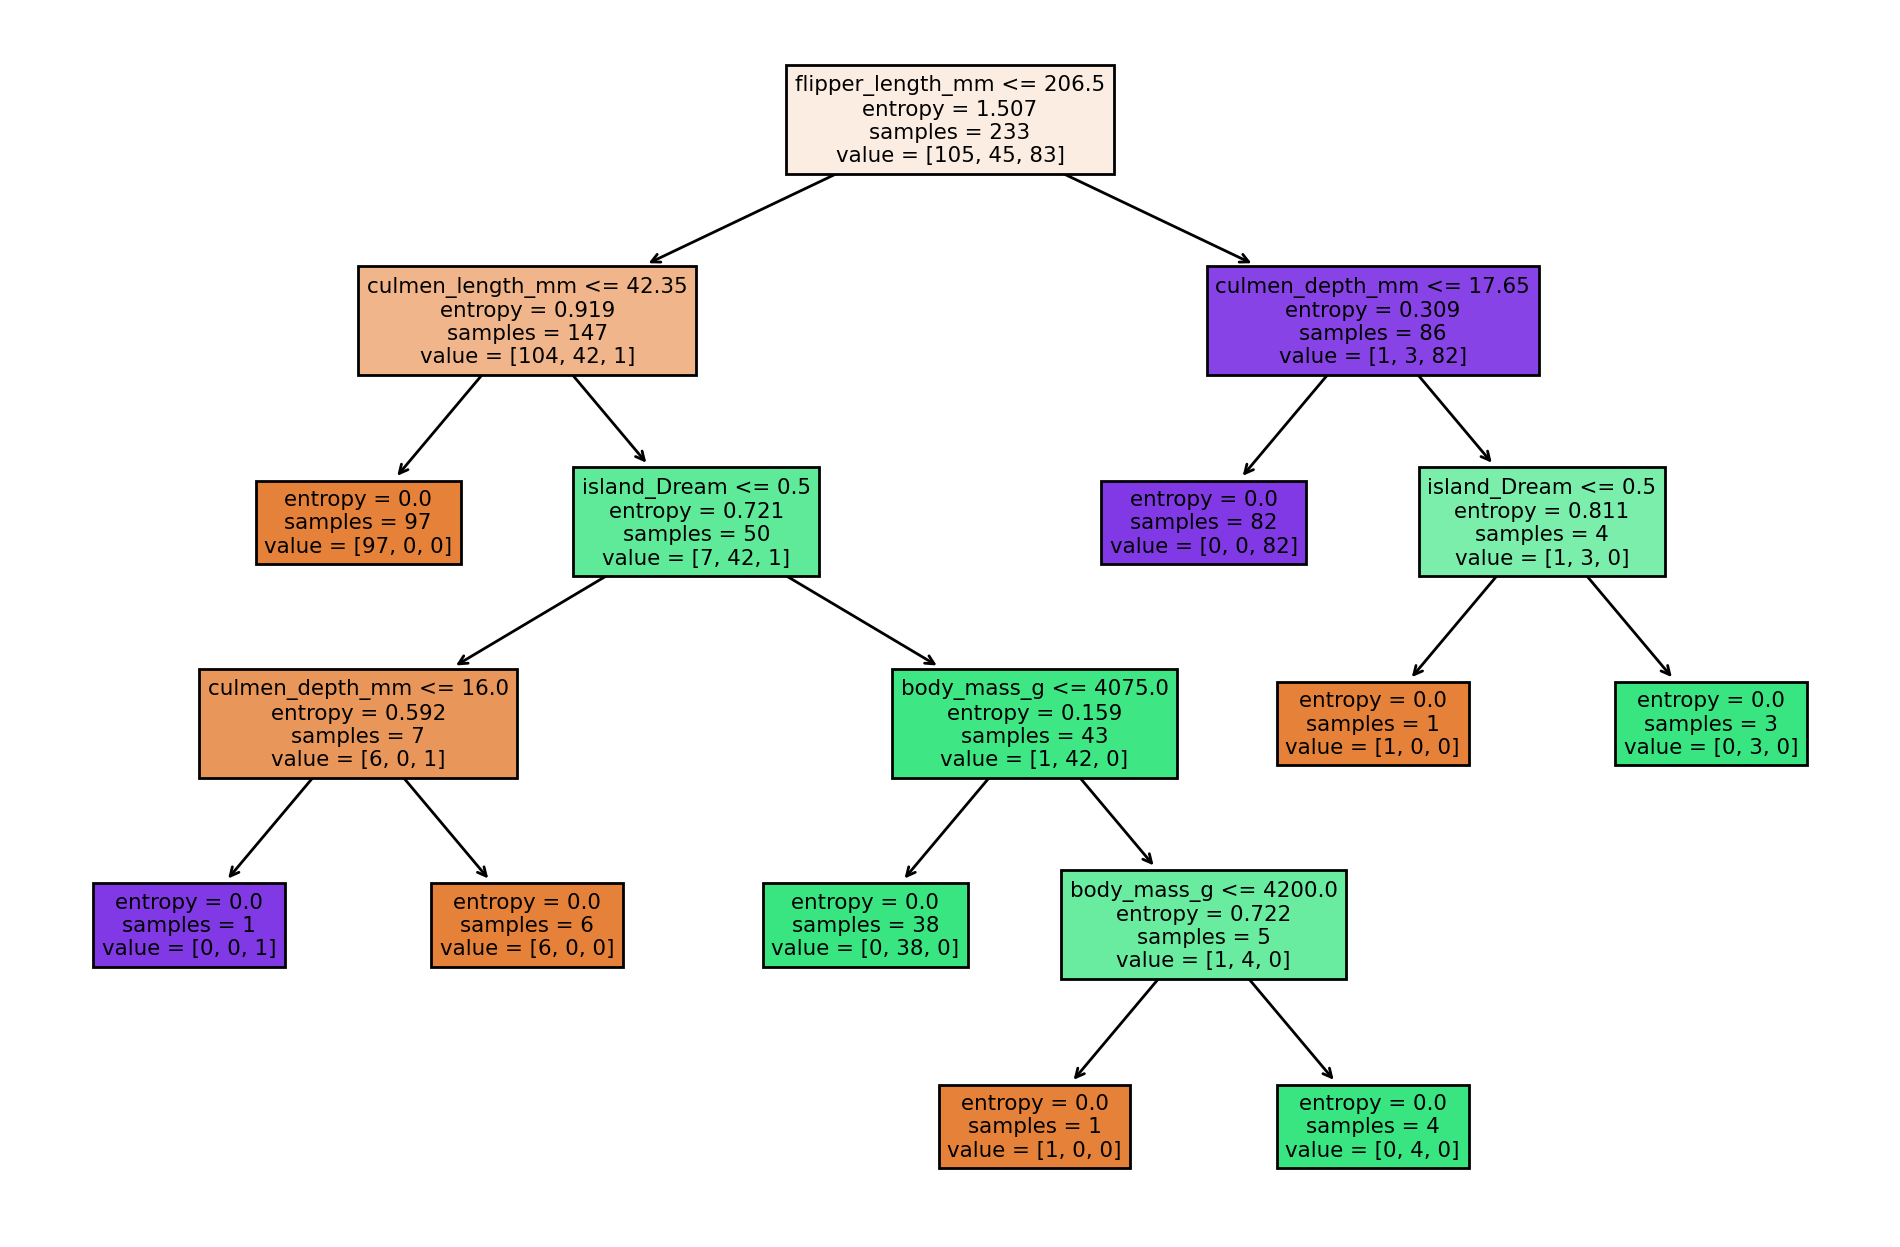

In [97]:
report_model(entropy_tree)